In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [123]:
dataset = pd.read_csv('electricity_data.csv')

In [124]:
dataset

,Country Name,Country Code,Indicator Name,1990,1991,1992,1993,1994,1995,1996,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,Access to electricity (% of population),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,93.356292,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,Afghanistan,AFG,Access to electricity (% of population),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45.670555,42.700000,43.222019,69.100000,68.933266,89.500000,71.500000,97.700000,97.700000,98.713203
2,Angola,AGO,Access to electricity (% of population),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32.324120,33.393711,34.600000,35.666500,36.872383,32.000000,42.000000,40.668018,41.962894,43.259258
3,Albania,ALB,Access to electricity (% of population),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,99.900000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
4,Andorra,AND,Access to electricity (% of population),100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
5,Arab World,ARB,Access to electricity (% of population),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,84.270921,86.959991,87.199474,87.512260,88.129881,87.275323,88.720097,89.308602,90.283638,89.286856
6,United Arab Emirates,ARE,Access to electricity (% of population),100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
7,Argentina,ARG,Access to electricity (% of population),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,97.737106,98.820000,99.278694,99.497856,99.476555,100.000000,99.827118,99.959122,100.000000,100.000000
8,Armenia,ARM,Access to electricity (% of population),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.382713,99.800000,99.830490,99.897026,99.894287,99.957283,100.000000,100.000000,100.000000,100.000000
9,American Samoa,ASM,Access to electricity (% of population),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
def extract_country_row(dataset, country_name):
    dataset.loc[dataset['Country Name'] == country_name] = dataset.loc[dataset['Country Name'] == country_name].fillna(0)
    return dataset.loc[dataset['Country Name'] == country_name]

def plot_country_data(dataset, country_name, plot_line):
    starting_year = 1990    
    y = np.array(extract_country_row(dataset, country_name).iloc[:, -29:]).flatten()
    for i in range(len(y)):
        if y[i] != 0:
            break
            
    starting_year += i
    y = y[i:]
    x = np.array(range(starting_year, 2019))
    
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, y, 'o')
    if plot_line:
        plt.plot(x, m*x + b)
        print(m)
        print(b)
    plt.title('% of population of ' + country_name + ' with access to electricity vs Time')
    plt.xlabel('Time (years)')
    plt.ylabel('% of population with access to electricity')
    
    plt.savefig(country_name + 'data.png')


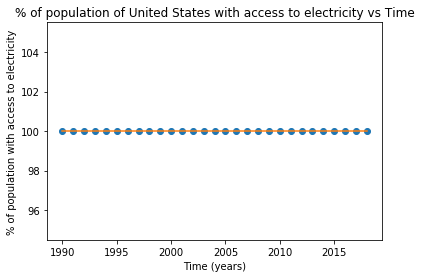

In [111]:
plot_country_data(dataset, "United States", True)

In [112]:
#finding area of least current electricity
print(dataset[dataset["2018"] == dataset["2018"].min()]["Country Name"])

14    Burundi
Name: Country Name, dtype: object


In [114]:
extract_country_row(dataset, "Burundi")

,Country Name,Country Code,Indicator Name,1990,1991,1992,1993,1994,1995,1996,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
14,Burundi,BDI,Access to electricity (% of population),0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.546556,5.3,6.189969,6.5,6.9,7.0,8.631607,9.6375,9.3,11.024252


0.35592946092853306
-709.0524677138634


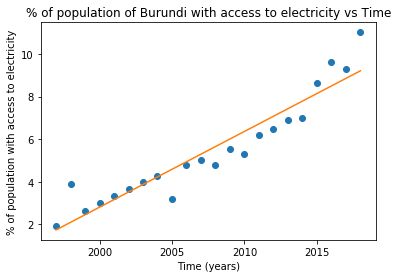

In [121]:
plot_country_data(dataset, "Burundi", True)

1.7700087726299822
-3481.0973041969214


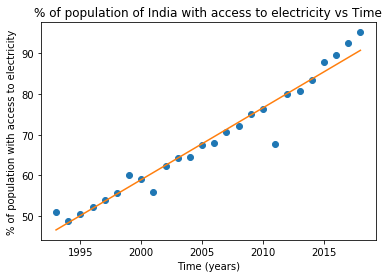

In [122]:
plot_country_data(dataset, "India", True)

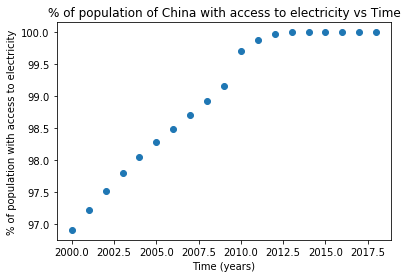

In [117]:
plot_country_data(dataset, "China", False)

In [ ]:
y = 0.35592946092853306 x - 709.0524677138634